<p align="center">
  <img src="https://img.shields.io/badge/Research%20Mode-ON-4cbb17?style=for-the-badge" alt="Research Mode">
</p>

# 01 · Getting Started — ASAP CRN Learning Lab  
*A guided launchpad for your first ASAP-CRN workspace adventure.*

Welcome to the **ASAP-CRN Learning Lab Pilot Workshop Series!**  

This notebook walks you through the essentials of setting up, exploring, and running your first analyses in **Verily Workbench**.

> 💡 **Tip:** Run each cell in order for the smoothest setup experience.  
> You can always come back later to experiment and make it your own.


In [1]:
# setting up environment
import sys
print(sys.executable)
from pathlib import Path
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1200)

import os
import math
import matplotlib.pyplot as plt
from PIL import Image

try:
    import scanpy as sc
except ImportError as e:
    print("Error -> ", e)
    print("Installing scanpy")
    !{sys.executable} -m pip install scanpy
    import scanpy as sc


/usr/bin/python3


# Table of Contents
1. [Workspace Orientation](#workspace-orientation)    
2. [Setting Project Paths](#setting-project-paths)
    - [2.1 Understanding the Path Components](#dataset-paths)
    - [2.2 Accessing Metadata](#analysis-output-files)
    - [2.3 Evaluating Curated Files](#metadata-files)
3. [Exploring a Dataset](#exploring-a-dataset)  
   - [3.1 Inspect QC Plots](#inspect-qc-plots)
   - [3.2 Copying Data Locally](#copying-data-locally)
   - [3.3 Preview Cell Metadata](#preview-cell-metadata)
   - [3.4 Preview AnnData](#preview-anndata)
5. [Saving Outputs](#saving-outputs)  
6. [Reproducibility Notes](#reproducibility-notes)  
7. [Next Steps](#next-steps)  
8. [Changelog](#changelog)

## 1. Workspace Orientation

In the **ASAP-CRN Learning Lab** workspace, data and resources are mounted under your home directory, typically:

- `~/workspace/` – workspace mount for data and outputs  
- `~/workspace/*/asap-curated-team/` – team-specific curated and derived datasets
- `~/workspace/*/asap-curated-cohort/` – multi-team curated and derived datasets  
- `~/workspace/ws_files/` – your personal scratch space for files and results  

General subfolders: 
- `~/cohort_analysis` - Processed cohort-level outputs
- `~/preprocess` - Intermediate files from data curation outputs
In this section, we’ll confirm these paths and see what’s available.

In [2]:
#set general folder paths
HOME = Path.home()
WS_ROOT = HOME / "workspace"
DATA_DIR = WS_ROOT / "Data"
WS_FILES = WS_ROOT / "ws_files"

if not WS_ROOT.exists():
    print(f"{WS_ROOT} doesn't exist. We need to remount our resources")
    !wb resource mount    

print("Home directory:     ", HOME)
print("Workspace root:     ", WS_ROOT)
print("Data directory:     ", DATA_DIR)
print("ws_files directory: ", WS_FILES)

print("\nContents of workspace root:")
for p in WS_ROOT.glob("*"):
    print(" -", p.name, "/" if p.is_dir() else "")

Home directory:      /home/jupyter
Workspace root:      /home/jupyter/workspace
Data directory:      /home/jupyter/workspace/Data
ws_files directory:  /home/jupyter/workspace/ws_files

Contents of workspace root:
 - 02_PMDBS_bulkRNAseq /
 - 05_Other_Datasets /
 - 04_Mouse_Spatial /
 - ws_files /
 - release_resources /
 - Documentation /
 - 03_PMDBS_Spatial /
 - 01_PMDBS_scRNAseq /


## 2. Setting Project Paths

For the next steps, we will work with datasets processed using the **PMDBS scRNAseq** workflow. Specifically, we will focus on the **cohort-level dataset**: `asap-cohort-pmdbs-sc-rnaseq`.  

This dataset represents a multi-dataset integration: samples from **five contributing datasets**, processed, curated, and harmonized into a single cohort resource.

### 2.1 Understanding the Path Components
The dataset paths follow a structured hierarchy. Each component has a specific meaning:

- **`workflow`** — identifies the workflow used for aggregation and integration.  
  Here we use the **[PMDBS scRNAseq workflow](https://github.com/ASAP-CRN/pmdbs-sc-rnaseq-wf)**.

- **`dataset_team`** — identifies the contributing team or grouping of datasets. For cohort-level analyses, this value is **`cohort`**, indicating multiple datasets combined.

- **`source`** — describes the biological source of the samples.  
  In this case, **`pmdbs`** refers to *post-mortem–derived brain samples*.

- **`dataset_type`** — describes the type of data generated.  
  Here it is **`sc-rnaseq`**, indicating single-cell RNA sequencing.

- **`bucket_name`** — the Google Cloud Storage bucket containing the curated dataset.

- **`dataset_name`** — a unique identifier for each curated dataset or collection.


In [3]:
## Build and set path to desired dataset

DATASETS_PATH = WS_ROOT / "01_PMDBS_scRNAseq"

workflow       = "pmdbs_sc_rnaseq"
dataset_team   = "cohort"
dataset_source = "pmdbs"
dataset_type   = "sc-rnaseq"

bucket_name  = f"asap-curated-{dataset_team}-{dataset_source}-{dataset_type}"
dataset_name = f"asap-{dataset_team}-{dataset_source}-{dataset_type}"

dataset_path = DATASETS_PATH / bucket_name / workflow
print("Dataset Path:", dataset_path)

Dataset Path: /home/jupyter/workspace/01_PMDBS_scRNAseq/asap-curated-cohort-pmdbs-sc-rnaseq/pmdbs_sc_rnaseq


In [4]:
cohort_analysis_path = dataset_path / "cohort_analysis"

In [5]:
!ls  {cohort_analysis_path} 
# pythonic way: 
# [f.name for f in cohort_analysis_path.glob("**/*") if f.is_file()]

asap-cohort.all_genes.csv
asap-cohort.doublet_score.violin.png
asap-cohort.features.umap.png
asap-cohort.final.h5ad
asap-cohort.final_metadata.csv
asap-cohort.groups.umap.png
asap-cohort.hvg_genes.csv
asap-cohort.merged_cleaned_unfiltered.h5ad
asap-cohort.mmc_otf_mapping.SEAAD.extended_results.json
asap-cohort.mmc_otf_mapping.SEAAD.log.txt
asap-cohort.mmc_otf_mapping.SEAAD.results.csv
asap-cohort.mmc_results.parquet
asap-cohort.n_genes_by_counts.violin.png
asap-cohort.pct_counts_mt.violin.png
asap-cohort.pct_counts_rb.violin.png
asap-cohort.sample_list.tsv
asap-cohort.scanvi_cell_types.parquet
asap-cohort.scanvi_model.tar.gz
asap-cohort.scib_report.csv
asap-cohort.scib_results.svg
asap-cohort.scvi_model.tar.gz
asap-cohort.total_counts.violin.png
MANIFEST.tsv


## 2.2 Accessing Metadata Files

Metadata for each dataset is located within the `release_resources` directory. See the [Data Dictionary](https://storage.googleapis.com/asap-public-assets/wayfinding/ASAP-CRN-Cloud-Data-Dictionary.pdf) for an overview of the metadata tables.

> **Note:**  
> Metadata files are organized using the **short `dataset_name`**, not the `bucket_name`.  
> You can always use the File Browser tab of the side panel to explore directories and right-click any folder or file to copy its full path.


In [6]:
#Define metadata folder path
ds_metadata_path = WS_ROOT / "release_resources/cohort-pmdbs-sc-rnaseq/metadata"

#preview contents
!ls {ds_metadata_path} 

ASSAY_RNAseq.csv  collection_version  PMDBS.csv     STUDY.csv
cde_version	  CONDITION.csv       PROTOCOL.csv  SUBJECT.csv
CLINPATH.csv	  DATA.csv	      SAMPLE.csv


In [7]:
# preview a dataset metadata file 
display(pd.read_csv(ds_metadata_path / "CONDITION.csv", index_col=0).head(10))

,ASAP_team_id,ASAP_dataset_id,condition_id,intervention_name,intervention_id,protocol_id,intervention_aux_table
0,TEAM_HAFLER,DS_PMDBS_0002,Control,Case-Control,NaN,NaN,NaN
1,TEAM_HAFLER,DS_PMDBS_0002,PD,Case-Control,NaN,NaN,NaN
2,TEAM_LEE,DS_PMDBS_0001,Control,Case-Control,NaN,NaN,NaN
3,TEAM_LEE,DS_PMDBS_0001,PD,Case-Control,NaN,NaN,NaN
4,TEAM_JAKOBSSON,DS_PMDBS_0004,PD,Case-Control,Case,NaN,NaN
5,TEAM_JAKOBSSON,DS_PMDBS_0004,Control,Case-Control,Control,NaN,NaN
6,TEAM_SCHERZER,DS_PMDBS_0005,NaN,Case-Control,Case,NaN,NaN
7,TEAM_SCHERZER,DS_PMDBS_0005,NaN,Case-Control,Control,NaN,NaN
8,TEAM_SCHERZER,DS_PMDBS_0005,NaN,Case-Control,Other,NaN,NaN
9,TEAM_HARDY,DS_PMDBS_0003,PD,Case-Control,NaN,NaN,NaN


### 2.3 Inspecting Curated Files

Now that our path components are defined, we can inspect the curated files available in the cohort_analysis directory.

In [8]:
# Build the folder path to the cohort analysis directory
cohort_analysis_path = dataset_path / "cohort_analysis"

# Preview the directory contents
print("Contents of cohort_analysis:")
!ls {cohort_analysis_path}

# Optional pure-Python preview:
# [f.name for f in cohort_analysis_path.glob("**/*") if f.is_file()]

Contents of cohort_analysis:
asap-cohort.all_genes.csv
asap-cohort.doublet_score.violin.png
asap-cohort.features.umap.png
asap-cohort.final.h5ad
asap-cohort.final_metadata.csv
asap-cohort.groups.umap.png
asap-cohort.hvg_genes.csv
asap-cohort.merged_cleaned_unfiltered.h5ad
asap-cohort.mmc_otf_mapping.SEAAD.extended_results.json
asap-cohort.mmc_otf_mapping.SEAAD.log.txt
asap-cohort.mmc_otf_mapping.SEAAD.results.csv
asap-cohort.mmc_results.parquet
asap-cohort.n_genes_by_counts.violin.png
asap-cohort.pct_counts_mt.violin.png
asap-cohort.pct_counts_rb.violin.png
asap-cohort.sample_list.tsv
asap-cohort.scanvi_cell_types.parquet
asap-cohort.scanvi_model.tar.gz
asap-cohort.scib_report.csv
asap-cohort.scib_results.svg
asap-cohort.scvi_model.tar.gz
asap-cohort.total_counts.violin.png
MANIFEST.tsv


## 3. Exploring a Dataset

With the directory structure in place, we can begin exploring the processed outputs produced by the PMDBS scRNA-seq workflow.

### 3.1 Inspect QC Plots

The curated dataset includes several **QC violin plots** summarizing key metrics (e.g., doublet score, gene counts, mitochondrial content). Let’s load and display all violin plot images found in the folder.

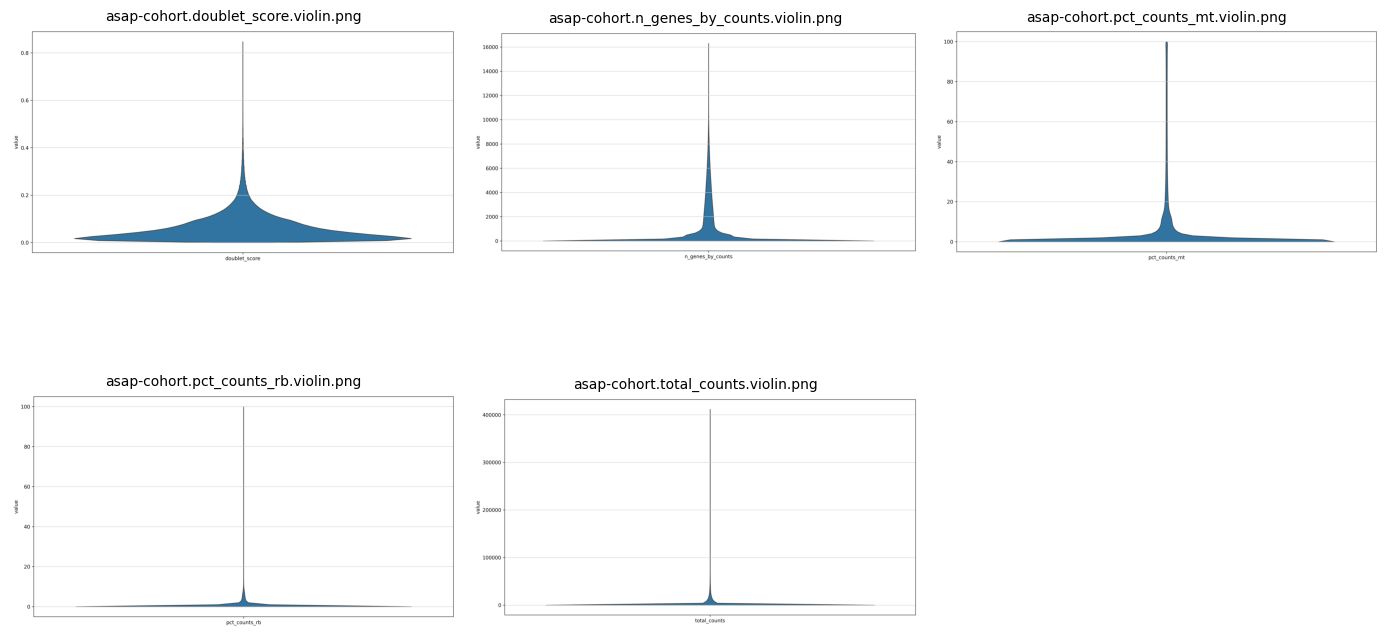

In [9]:
# Find all violin plot images
images = [
    os.path.join(cohort_analysis_path, f)
    for f in os.listdir(cohort_analysis_path)
    if f.lower().endswith("violin.png")
]

n = len(images)
if n == 0:
    print("No violin plots found in cohort_analysis.")
else:
    cols = 3
    rows = math.ceil(n / cols)

    plt.figure(figsize=(14, 4 * rows))

    for i, img_path in enumerate(images):
        img = Image.open(img_path)
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img)
        plt.title(os.path.basename(img_path), fontsize=10)
        plt.axis("off")

    plt.tight_layout()
    plt.show()

### 3.2 Downloading data files locally

In this step, we’ll set up a local directory inside our JupyterLab environment to store data files.  The `ws_files` area is a scratch space tied to your workspace — anything saved here can be accessed later in the notebook, processed with Python, or uploaded back to a workspace bucket for sharing.

We’ll create a folder called `workshop_files` under our workspace path (`WS_PATH`).  This ensures that all downloaded datasets are organized in one place.

In [10]:
# Define a local path for workshop files
local_data_path = WS_FILES / "pilot_workshop_files"

# Create the directory if it doesn't already exist
if not local_data_path.exists():
    local_data_path.mkdir(parents=True)

print(f"Local data directory ready at: {local_data_path}")


Local data directory ready at: /home/jupyter/workspace/ws_files/pilot_workshop_files


We can now download the curated `anndata object` and it's associated `obs` field locally into our workspace.
> **Note:**
> It is recommended to download desired data locally before loading into notebook to be more efficient. 

In [11]:
# Downloading obs field (cell metadata)
# Define the expected local path for the metadata file.
cell_metadata_local_path = local_data_path / f"asap-{dataset_team}.final_metadata.csv"\

# Check if the metadata file already exists locally.
if not cell_metadata_local_path.exists():
    # Construct the original path where the metadata file is stored.
    cell_metadata_og_path = cohort_analysis_path / f"asap-{dataset_team}.final_metadata.csv"

    # Use a shell command (`cp`) to copy the file from the original location
    # into the local workshop_files directory for analysis.
    !cp {cell_metadata_og_path} {cell_metadata_local_path}

In [12]:
# Downloading the anndata object
# Define the expected local path
adata_local_path = local_data_path / f"asap-{dataset_team}.final.h5ad"

# Check if the adata file already exists locally.
if not adata_local_path.exists():
    # Construct the original path where the metadata file is stored.
    adata_cell_metadata_og_path = cohort_analysis_path / f"asap-{dataset_team}.final.h5ad"

    # Use a shell command (`cp`) to copy the file from the original location
    # into the local workshop_files directory for analysis.
    !cp {adata_cell_metadata_og_path} {adata_local_path}

### 3.3 Exploring the Cell Metadata

Once the data is available in our `workshop_files` directory, we can begin exploring its metadata.

This field provides a compact entry point into the dataset’s metadata, making it easier to explore without handling the full expression matrix.

Each row in `obs` corresponds to a single cell (identified by a unique *barcode*) and contains:

- **Quality control metrics**: e.g. CellBender `cell_probability`, `n_genes_by_counts`, `total_counts`.  
- **Dataset references**: e.g. `sample`, `batch`, `team`, `dataset`.  
- **Downstream analysis results**: e.g. `UMAP_1`, `UMAP_2`, CellAssign `cell_type`, and Leiden cluster assignments.  

Together, these annotations summarize the key observations for each cell and provide a rich foundation for both quality assessment and downstream biological interpretation..


In [13]:
# load the adata object metadata
cell_metadata_df = pd.read_csv(cell_metadata_local_path, low_memory=False)
print(f"We have loaded the cell_metadata for N={cell_metadata_df.shape[0]} cells")
# Preview the contents 
cell_metadata_df.columns.to_list()

We have loaded the cell_metadata for N=3046127 cells


['Unnamed: 0',
 'background_fraction',
 'cell_probability',
 'cell_size',
 'droplet_efficiency',
 'n_genes_by_counts',
 'total_counts',
 'total_counts_rb',
 'pct_counts_rb',
 'total_counts_mt',
 'pct_counts_mt',
 'doublet_score',
 'sample',
 'batch',
 'team',
 'dataset',
 'batch_id',
 'S_score',
 'G2M_score',
 'phase',
 'cell_type',
 'phenotype',
 'rho',
 'prob',
 'class_name',
 'subclass_name',
 'supertype_name',
 '_scvi_batch',
 '_scvi_labels',
 'C_scANVI',
 'leiden_res_0.05',
 'leiden_res_0.10',
 'leiden_res_0.20',
 'leiden_res_0.40',
 'UMAP_1',
 'UMAP_2']

### 3.4 Exploring the AnnData

With the curated dataset stored locally, we can load it into memory using the `scanpy` library.  The data is stored in an **AnnData** object (`.h5ad` format), which is a common structure for single‑cell analysis.  

AnnData organizes the dataset into:
- **`.X`** → the main data matrix (e.g., gene expression counts).  
- **`.obs`** → per‑cell annotations (metadata such as QC metrics, sample IDs, cell types).  
- **`.var`** → per‑feature annotations (metadata about genes/features).  
- **`.uns`** → unstructured annotations (analysis results, parameters, plots).  

We’ll load the file in *backed mode* (`backed="r"`), which allows us to access the object without reading the entire matrix into memory — useful for large datasets.

In [14]:
# Load the curated AnnData object in backed mode
adata = sc.read_h5ad(adata_local_path, backed="r")

# Display a summary of the AnnData object
adata

KeyboardInterrupt: 

The above summary shows the number of cells (rows) and genes (columns), along with available annotations.  

Next, let’s visualize the dataset using a UMAP embedding to explore how cells are distributed by their assigned cell type.


In [ ]:
# Plot a UMAP embedding colored by cell type
sc.pl.embedding(adata, basis="umap", color=["cell_type"])


## 4. Saving Outputs Locally to `ws_files`

After exploring and analyzing the dataset, we often want to save results (e.g., processed tables, plots, or notebooks).  
The `ws_files` directory is your local scratch space in JupyterLab. Anything saved here can be accessed later in the session or uploaded back to a workspace bucket for sharing.

Example: saving a processed dataframe to CSV

In [ ]:
# Save a filtered dataframe locally

# Load AnnData into memory
# Subset in backed mode
adata_subset = adata[adata.obs["cell_type"] != "Unknown"].copy(
    filename=local_data_path / "adata_subset_assignedcells.h5ad"
)

# Define local save path inside ws_files/workshop_files
subset_path = local_data_path / "adata_subset_assignedcells.h5ad"

# Save the subsetted AnnData object
adata_subset.write(subset_path)